In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
# number of vectors sent
K = 5
# number of replications
nrep = 100
# number of training iterations
niter = np.array(range(K + 1))
# variable names
listSting = list(map(str, list(range(1,(K+2)))))

sig1= 0.6
sig2= 0.9


Xdist = "uniform"

n = 200

Loglikelihoods

In [3]:

# for Xdist in ["uniform"]:

#     ll_array = []
#     for sig in [0.9]:
#         for k in range(1,3): 
#             print(k)

#             data_tmp = pd.read_csv("data/ridgeTrainingAssistedMSE__betasetting_" + str(k) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
#             data_tmp = -data_tmp[['V' + s  for s in listSting]]
#             # import the rejection result
#             ll_array.append(data_tmp)


#     ll_oracle_array = []
#     for sig in [sig1,sig2]:
#         for k in range(1,3): 
#             print(k)

#             data_tmp = pd.read_csv("data/ridgeTrainingOracleMSE__betasetting_" + str(k) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
#             data_tmp = -data_tmp['x']
#             # import the rejection result
#             ll_oracle_array.append(data_tmp)


#     for j in range(0,2):
#         settingNum = j + 1
#         fname = "ridgeTrainingOracleMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist 

#         fit, axes = plt.subplots(1,2, figsize = (9, 8))
#         fit.set_size_inches(14, 5)  

#         fit.suptitle(' Setting ' + str(settingNum), fontsize=20)  

#         nList = [r'$n=200$', r'$n=2000$']
#         for i in range(2):
#             axe = axes[i]
#             # obtain data 
#             ind = i*2
#             n = nList[i]

#             # assisted learning ll
#             data_tmp = pd.read_csv("data/ridgeTrainingAssistedMSE__betasetting_" + str(k) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
#             ll_array = -data_tmp[['V' + s  for s in listSting]]
#             # assisted learning ll
#             data_tmp = pd.read_csv("data/ridgeTrainingOracleMSE__betasetting_" + str(k) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
#             data_tmp = -data_tmp['x']
#             # import the rejection result
#             ll_oracle_array.append(data_tmp)

#             ll_mean1 = np.mean(ll_array, axis = 0)
#             ll_ste1 = np.std(ll_array, axis = 0)/math.sqrt(nrep)


#             ll_oracle_mean = np.repeat(np.mean(ll_oracle_array), (K+1) )
#             ll_oracle_ste = np.repeat(np.std(ll_oracle_array), (K+1) )/math.sqrt(nrep)
            
#             axe.errorbar((niter), ll_mean1 , ll_ste1, marker = 'o')
#             axe.errorbar((niter + 0.15), ll_oracle_mean , ll_oracle_ste, marker = "*", linestyle = 'dotted', markersize=8)
#             axe.set_xlabel("Number of iterations", fontsize=20)
#             axe.set_ylabel("Log-likelihood", fontsize=20)
#             axe.set_title(nList[i], fontsize=20)
            
#             if i==1:
#                 axe.legend(['AE-AL', 'Oracle estimator'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
#             elif i<1:
#                 axe.legend('',frameon=False)
#         plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])
#         plt.savefig('Result_Figure/' + fname +'.pdf')
#         #plt.show()

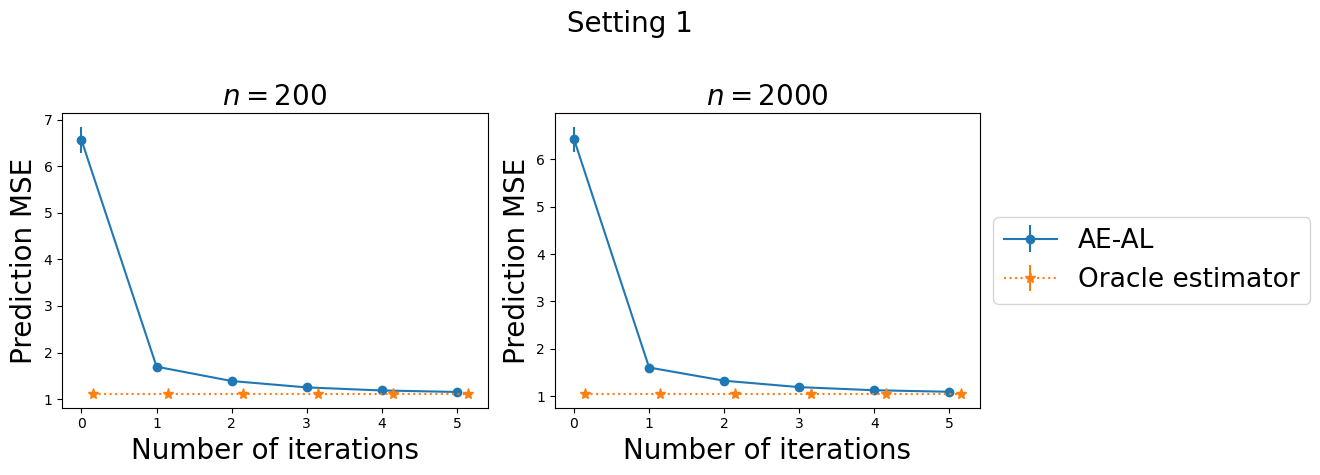

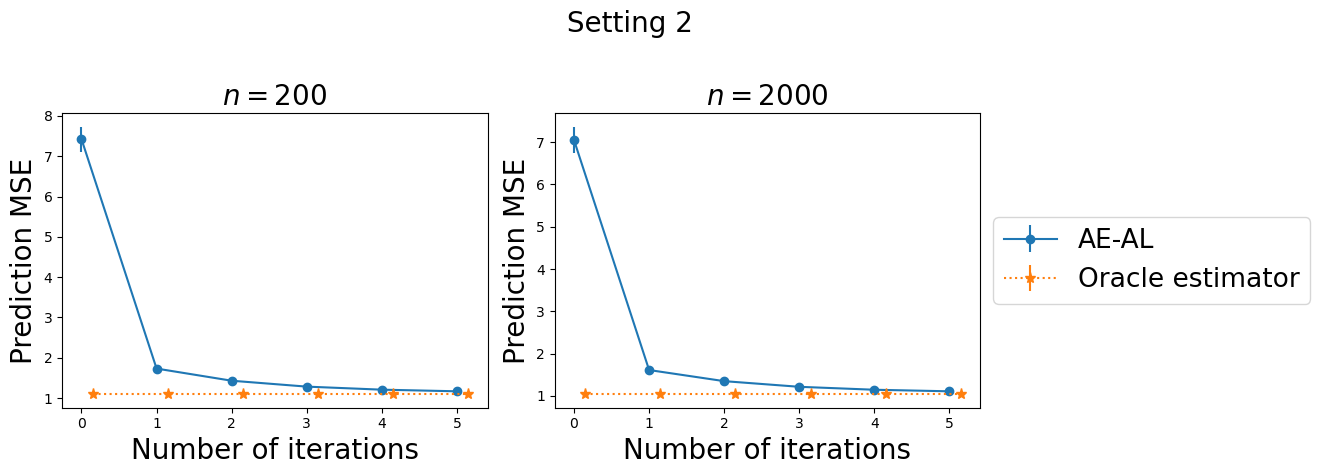

In [5]:
sig=0.9
n=200

for j in range(0,2):
    settingNum = j + 1
    fname = "ridgeTrainingOracleMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist 

    fit, axes = plt.subplots(1,2, figsize = (9, 8))
    fit.set_size_inches(14, 5)  

    fit.suptitle(' Setting ' + str(settingNum), fontsize=20)  

    nList = [200, 2000]
    for i in range(2):
        axe = axes[i]
        # obtain data 
        ind = i*2
        n = nList[i]

        # assisted learning ll
        data_tmp = pd.read_csv("data/ridgeTrainingAssistedMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
        ll_array = -data_tmp[['V' + s  for s in listSting]]
        # oracle  ll
        data_tmp = pd.read_csv("data/ridgeTrainingOracleMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
        data_tmp = -data_tmp['x']
        
        ll_oracle_array = data_tmp

        ll_mean1 = np.mean(ll_array, axis = 0)
        ll_ste1 = np.std(ll_array, axis = 0)/math.sqrt(nrep)


        ll_oracle_mean = np.repeat(np.mean(ll_oracle_array), (K+1) )
        ll_oracle_ste = np.repeat(np.std(ll_oracle_array), (K+1) )/math.sqrt(nrep)
        
        axe.errorbar((niter), -ll_mean1 , ll_ste1, marker = 'o')
        axe.errorbar((niter + 0.15), -ll_oracle_mean , ll_oracle_ste, marker = "*", linestyle = 'dotted', markersize=8)
        axe.set_xlabel("Number of iterations", fontsize=20)
        axe.set_ylabel("Prediction MSE", fontsize=20)
        axe.set_title(r'$n=' + str(nList[i]) + '$', fontsize=20)
        #axe.set_ylim(-7.8,-0.5)
        
        if i==1:
            axe.legend(['AE-AL', 'Oracle estimator'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
        elif i<1:
            axe.legend('',frameon=False)
    plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])
    fgname = "ridgeTrainingOracleMSE__betasetting_" + str(settingNum) +  "_n_" + str(n)  + "_Xdist_" + Xdist 
    # set the title
    # plt.title('Grouped boxplot using matplotlib')
    #===========================create folder to store output results=====================
    results_path_data = "./Result_Figure"
    # Check whether the specified path exists or not
    isExist = os.path.exists(results_path_data)

    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(results_path_data)
    plt.savefig('Result_Figure/' + fgname + '.pdf')

Tuning parameter Lambda

1
2
1
2
1
2
1
2


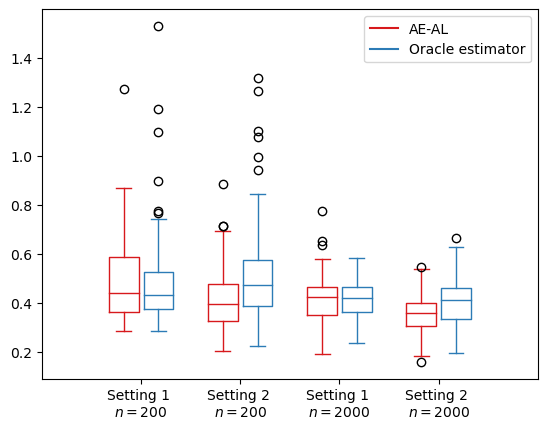

In [16]:
lam_array = []
for n in nList:
    for k in range(1,3): 
        print(k)

        data_tmp = pd.read_csv("data/ridgeTrainingAssistedlam__betasetting_" + str(k) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
        data_tmp = data_tmp['x']
        # import the rejection result
        lam_array.append(data_tmp)

lam_oracle_array = []
for n in nList:
    for k in range(1,3): 
        print(k)

        data_tmp = pd.read_csv("data/ridgeTrainingOraclelam__betasetting_" + str(k) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + ".csv", header = 0)  
        data_tmp = data_tmp['x']
        # import the rejection result
        lam_oracle_array.append(data_tmp)

# import the matplotlib package
import matplotlib.pyplot as plt

# import the numpy package
import numpy as np

# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high 
ticks = ['Setting 1 \n' + r'$n= ' + str(nList[0]) +'$', 'Setting 2 \n' + r'$n= ' + str(nList[0]) +'$',
	 'Setting 1 \n' + r'$n= ' + str(nList[1]) +'$', 'Setting 2 \n' + r'$n= ' + str(nList[1]) +'$']


lam_array_list = lam_array
lam_oracle_array_list = lam_oracle_array

summer_rain_plot = plt.boxplot(lam_array_list,
							positions=np.array(
	np.arange(len(lam_array_list)))*2.0-0.35,
							widths=0.6)
winter_rain_plot = plt.boxplot(lam_oracle_array_list,
							positions=np.array(
	np.arange(len(lam_oracle_array_list)))*2.0+0.35,
							widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
	for k, v in plot_name.items():
		plt.setp(plot_name.get(k), color=color_code)
		
	# use plot function to draw a small line to name the legend.
	plt.plot([], c=color_code, label=label)
	plt.legend()


# setting colors for each groups
define_box_properties(summer_rain_plot, '#D7191C', 'AE-AL')
define_box_properties(winter_rain_plot, '#2C7BB6', 'Oracle estimator')

# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)

# set the limit for x axis
plt.xlim(-2, len(ticks)*2)

# set the limit for y axis
#plt.ylim(0, 50)

fgname = "ridgeTrainingOracleMSE_"+  "n_" + str(n)  + "_Xdist_" + Xdist 
# set the title
# plt.title('Grouped boxplot using matplotlib')

plt.savefig('Result_Figure/' + fgname + '_Lam_' + '.pdf')
